In [1131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [1132]:
train = pd.read_csv('product_train.csv')
test = pd.read_csv('product_test.csv')

In [1133]:
train.describe()

,ID,Product_ID,Age,Rating,Recommended,Positive_Feedback_Count
count,16440.000000,16440.000000,16440.000000,16440.000000,16440.000000,16440.000000
mean,11709.318066,918.378163,43.195742,4.203710,0.824027,2.563747
std,6769.069499,203.941617,12.272769,1.106165,0.380809,5.910660
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5865.750000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11703.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17540.500000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [1134]:
print('train data dimension',np.shape(train))
print('test data dimension',np.shape(test))

train data dimension (16440, 11)
test data dimension (6803, 10)


In [1135]:
train.isnull().sum()

ID                            0
Product_ID                    0
Age                           0
Review_Title               2638
Review_Text                 602
Rating                        0
Recommended                   0
Positive_Feedback_Count       0
Division                      9
Department                    9
Type                          9
dtype: int64

In [1136]:
test.isnull().sum()

ID                           0
Product_ID                   0
Age                          0
Review_Title               929
Review_Text                  0
Rating                       0
Positive_Feedback_Count      0
Division                     5
Department                   5
Type                         5
dtype: int64

In [1137]:
train['Review_Text'].fillna('No text',inplace = True)
train['Review_Title'].fillna('No title',inplace = True)

In [1138]:
test['Review_Title'].fillna('No title',inplace = True)

In [1139]:
train.loc[train['Division'].isnull()]

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division,Department,Type
176,23011,136,36,Super socks,I love these little socks ? and the dots spark...,5,1,0,NaN,NaN,NaN
980,13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
4203,20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN
4894,18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
9326,13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
9339,16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
14436,16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
14854,13787,492,48,No title,No text,5,1,0,NaN,NaN,NaN
15026,18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN


In [1140]:
print('Division category')
print(train['Division'].value_counts())

Division category
General           9677
General Petite    5680
Initmates         1074
Name: Division, dtype: int64


In [1141]:
print('Department category')
print(train['Department'].value_counts())

Department category
Tops        7288
Dresses     4475
Bottoms     2620
Intimate    1235
Jackets      732
Trend         81
Name: Department, dtype: int64


In [1142]:
print('Type category')
print(train['Type'].value_counts())

Type category
Dresses           4475
Knits             3393
Blouses           2129
Sweaters          1003
Pants              943
Jeans              801
Fine gauge         763
Skirts             652
Jackets            496
Lounge             493
Swim               249
Outerwear          236
Shorts             223
Sleep              166
Legwear            116
Intimates          107
Layering           103
Trend               81
Casual bottoms       1
Chemises             1
Name: Type, dtype: int64


In [1143]:
train.loc[176,['Division','Department','Type']] = ['Initmates','Intimate','Legwear']
train.loc[176,:]

ID                                                                     23011
Product_ID                                                               136
Age                                                                       36
Review_Title                                                     Super socks
Review_Text                I love these little socks ? and the dots spark...
Rating                                                                     5
Recommended                                                                1
Positive_Feedback_Count                                                    0
Division                                                           Initmates
Department                                                          Intimate
Type                                                                 Legwear
Name: 176, dtype: object

In [1144]:
train.loc[980,['Division','Department','Type']] = ['General','Tops','Sweaters']
train.loc[4203,['Division','Department','Type']] = ['General','Tops','Sweaters']
train.loc[4894,['Division','Department','Type']] = ['Initmates','Intimate','Legwear']
train.loc[9326,['Division','Department','Type']] = ['General','Tops','Sweaters']
train.loc[9339,['Division','Department','Type']] = ['Initmates','Intimate','Legwear']
train.loc[14436,['Division','Department','Type']] = ['General','Tops','Sweaters']
train.loc[15026,['Division','Department','Type']]=['Initmates','Intimate','Intimate']

In [1145]:
train = train.dropna()

In [1146]:
test.loc[test['Division'].isnull()]

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Positive_Feedback_Count,Division,Department,Type
2696,9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,0,NaN,NaN,NaN
4653,16221,152,37,Love!,I am loving these. they are quite long but are...,5,0,NaN,NaN,NaN
6216,21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,0,NaN,NaN,NaN
6638,22997,136,47,"Charcoal, pale gray, a bit of silver!","These socks are soft and comfortable, and they...",5,1,NaN,NaN,NaN
6640,23006,136,33,Cute itsy socks,"Love polkadots, love sparkle. these little soc...",5,0,NaN,NaN,NaN


In [1147]:
test.loc[2696,['Division','Department','Type']] = ['Initmates','Intimate','Legwear']
test.loc[4653,['Division','Department','Type']] = ['Initmates','Intimate','Legwear']
test.loc[6216,['Division','Department','Type']] = ['General','Tops','Knits']
test.loc[6638,['Division','Department','Type']] = ['Initmates','Intimate','Legwear']
test.loc[6640,['Division','Department','Type']] = ['Initmates','Intimate','Legwear']

In [1148]:
train.isnull().sum()

ID                         0
Product_ID                 0
Age                        0
Review_Title               0
Review_Text                0
Rating                     0
Recommended                0
Positive_Feedback_Count    0
Division                   0
Department                 0
Type                       0
dtype: int64

In [1149]:
test.isnull().sum()

ID                         0
Product_ID                 0
Age                        0
Review_Title               0
Review_Text                0
Rating                     0
Positive_Feedback_Count    0
Division                   0
Department                 0
Type                       0
dtype: int64

In [1150]:
print(train.shape)
print(test.shape)

(16439, 11)
(6803, 10)


In [1151]:
train["Recommended"].value_counts()

1    13546
0     2893
Name: Recommended, dtype: int64

In [1152]:
train.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division,Department,Type
0,12906,984,57,Unique,"Just received and sorry to return. i am 5'9"" i...",4,1,1,General Petite,Jackets,Jackets
1,22440,872,60,Simple beauty,This is a tts basic tee with the added flare o...,5,1,3,General Petite,Tops,Knits
2,13965,862,35,Love this top!,I am very happy with this shirt. i don't like ...,5,1,0,General,Tops,Knits
3,14369,829,45,No title,"Really flattering cut, this shirt is perfect f...",5,1,0,General Petite,Tops,Blouses
4,505,833,56,No title,Love the fabric & lace on this top. like other...,4,1,0,General,Tops,Blouses


In [1153]:
test.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Positive_Feedback_Count,Division,Department,Type
0,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,14,General,Dresses,Dresses
1,11,1095,39,No title,This dress is perfection! so pretty and flatte...,5,2,General Petite,Dresses,Dresses
2,13,767,44,Runs big,Bought the black xs to go under the larkspur m...,5,0,Initmates,Intimate,Intimates
3,19,1077,47,Stylish and comfortable,I love the look and feel of this tulle dress. ...,5,0,General,Dresses,Dresses
4,24,847,55,Versatile,"I love this shirt because when i first saw it,...",5,0,General,Tops,Blouses


# EDA

In [1154]:
datapreview = train.describe()
datapreview

,ID,Product_ID,Age,Rating,Recommended,Positive_Feedback_Count
count,16439.000000,16439.000000,16439.000000,16439.000000,16439.000000,16439.000000
mean,11709.191678,918.404100,43.195450,4.203662,0.824016,2.563903
std,6769.255994,203.920703,12.273085,1.106181,0.380818,5.910805
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5865.500000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11703.000000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17541.000000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [1155]:
datapreview.loc['skew',:] = datapreview.skew()
datapreview.loc['kurt',:] = datapreview.kurt()
datapreview.round(3)

,ID,Product_ID,Age,Rating,Recommended,Positive_Feedback_Count
count,16439.000,16439.000,16439.000,16439.000,16439.000,16439.000
mean,11709.192,918.404,43.195,4.204,0.824,2.564
std,6769.256,203.921,12.273,1.106,0.381,5.911
min,0.000,0.000,18.000,1.000,0.000,0.000
25%,5865.500,861.000,34.000,4.000,1.000,0.000
50%,11703.000,936.000,41.000,5.000,1.000,1.000
75%,17541.000,1078.000,52.000,5.000,1.000,3.000
max,23485.000,1205.000,99.000,5.000,1.000,122.000
skew,0.016,2.795,2.828,2.828,2.828,2.828
kurt,-0.829,8.803,8.999,9.000,9.000,8.999


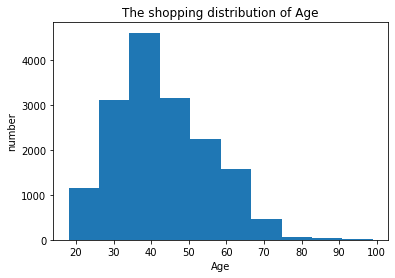

In [1156]:
plt.hist(train['Age'])
plt.title('The shopping distribution of Age')
plt.xlabel('Age')
plt.ylabel('number')
plt.show()

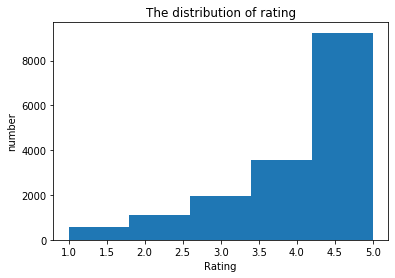

In [1157]:
plt.hist(train['Rating'],bins = 5)
plt.title('The distribution of rating')
plt.xlabel('Rating')
plt.ylabel('number')
plt.show()

In [1158]:
counting = train.pivot_table(index = ['Product_ID','Division','Department','Type'], values = ['ID'], aggfunc = ['count'])

counting

,,,,count
,,,,ID
Product_ID,Division,Department,Type,
0,General,Jackets,Outerwear,1
1,Initmates,Intimate,Layering,3
2,General,Tops,Knits,1
4,General,Tops,Sweaters,1
5,General,Tops,Sweaters,1
...,...,...,...,...
1200,General,Dresses,Dresses,1
1202,General Petite,Dresses,Dresses,7


In [1159]:
counting.sort_values(by = ('count','ID'))

,,,,count
,,,,ID
Product_ID,Division,Department,Type,
0,General,Jackets,Outerwear,1
560,General,Trend,Trend,1
563,General,Trend,Trend,1
568,General,Trend,Trend,1
570,General,Trend,Trend,1
...,...,...,...,...
1081,General Petite,Dresses,Dresses,280
1078,General Petite,Dresses,Dresses,287


In [1160]:
values = train.pivot_table( index = ['Product_ID','Division','Department','Type'], values = ['Rating','Positive_Feedback_Count','Recommended','Age'], aggfunc = np.mean)

values

,,,,Age,Positive_Feedback_Count,Rating,Recommended
Product_ID,Division,Department,Type,,,,
0,General,Jackets,Outerwear,26.000000,0.000000,5.000000,1.000000
1,Initmates,Intimate,Layering,36.666667,0.333333,4.000000,0.666667
2,General,Tops,Knits,28.000000,0.000000,4.000000,1.000000
4,General,Tops,Sweaters,28.000000,0.000000,5.000000,1.000000
5,General,Tops,Sweaters,39.000000,0.000000,5.000000,1.000000
...,...,...,...,...,...,...,...
1200,General,Dresses,Dresses,24.000000,0.000000,3.000000,0.000000
1202,General Petite,Dresses,Dresses,40.142857,0.428571,4.142857,1.000000
1203,Initmates,Intimate,Layering,36.400000,0.100000,4.500000,0.800000


In [1161]:
values['Amount_Sold'] = counting[('count','ID')]

In [1162]:
values.sort_values(by = 'Amount_Sold', ascending = False)


,,,,Age,Positive_Feedback_Count,Rating,Recommended,Amount_Sold
Product_ID,Division,Department,Type,,,,,
1078,General,Dresses,Dresses,42.334107,2.679814,4.290023,0.863109,431
862,General,Tops,Knits,42.899721,2.203343,4.119777,0.807799,359
1094,General,Dresses,Dresses,40.990446,2.961783,4.308917,0.875796,314
1078,General Petite,Dresses,Dresses,42.839721,3.104530,4.059233,0.756098,287
1081,General Petite,Dresses,Dresses,41.521429,2.989286,4.328571,0.860714,280
...,...,...,...,...,...,...,...,...
548,General,Trend,Trend,38.000000,0.000000,5.000000,1.000000,1
549,Initmates,Intimate,Layering,41.000000,0.000000,2.000000,0.000000,1
550,General,Trend,Trend,62.000000,0.000000,5.000000,1.000000,1


In [1163]:
X = train['Product_ID'].value_counts().index[:10].astype(str)
Y = train['Product_ID'].value_counts()[:10]


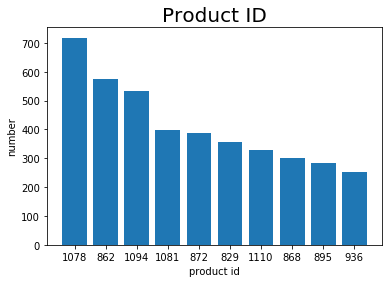

In [1164]:
plt.title('Product ID',fontsize = 20)
plt.bar(X, Y)
plt.xlabel('product id')
plt.ylabel('number')
plt.show()

Text(0, 0.5, 'Proportion')

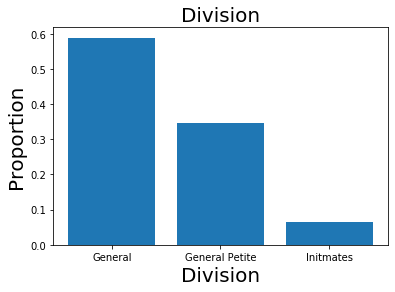

In [1165]:
DivisionX = train['Division'].value_counts().index
DivisionY = train['Division'].value_counts()/ train['Division'].value_counts().sum()
plt.bar(DivisionX, DivisionY)
plt.title('Division', fontsize = 20)
plt.xlabel('Division',fontsize = 20)
plt.ylabel('Proportion',fontsize = 20)
#general是最多的

Text(0, 0.5, 'Proportion')

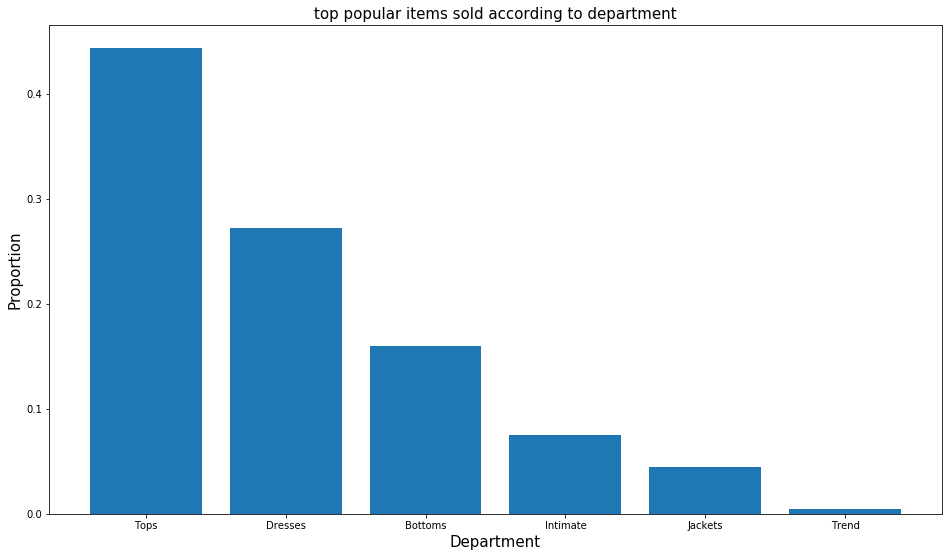

In [1166]:
plt.figure(figsize =(16,9))
DepartmentX = train['Department'].value_counts().index
DepartmentY = train['Department'].value_counts()/ train['Department'].value_counts().sum()
plt.bar(DepartmentX, DepartmentY)
plt.title('top popular items sold according to department', fontsize = 15)
plt.xlabel('Department',fontsize = 15)
plt.ylabel('Proportion',fontsize = 15)

Text(0, 0.5, 'Proportion')

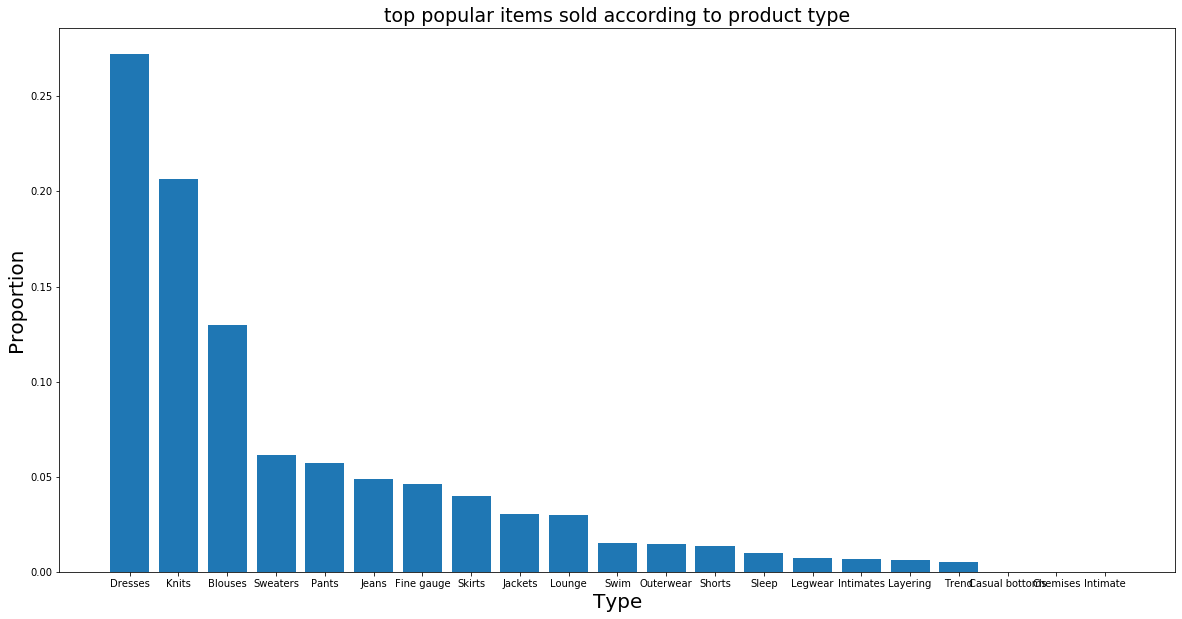

In [1167]:
TypeX = train['Type'].value_counts().index
TypeY = train['Type'].value_counts()/ train['Type'].value_counts().sum()

plt.figure(figsize =(20,10))
plt.bar(TypeX, TypeY)
plt.title('top popular items sold according to product type', fontsize = 19)
plt.xlabel('Type',fontsize = 20)
plt.ylabel('Proportion',fontsize = 20)

In [1168]:
Div_Rat = pd.crosstab(train['Rating'],train['Division'])
Div_Rat

Division,General,General Petite,Initmates
Rating,,,
1,335,205,39
2,668,364,62
3,1191,670,107
4,2099,1229,229
5,5388,3212,641


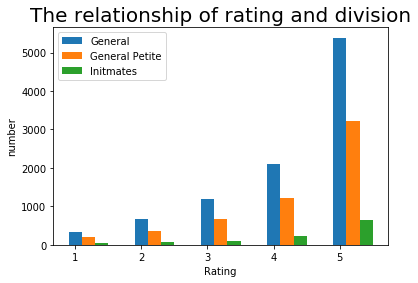

In [1169]:
DivX = Div_Rat.index
G = Div_Rat['General']
GP = Div_Rat['General Petite']
I = Div_Rat['Initmates']
width = 0.2

plt.title('The relationship of rating and division',fontsize = 20)
plt.bar(DivX, G, width, label = 'General')
plt.bar(DivX + width, GP, width, label = 'General Petite')
plt.bar(DivX + 2*width, I, width, label = 'Initmates')
plt.xlabel('Rating')
plt.ylabel('number')
plt.legend()
plt.show()

In [1170]:
Div_Rec = pd.crosstab(train['Recommended'],train['Division'])
Div_Rec

Division,General,General Petite,Initmates
Recommended,,,
0,1729,1002,162
1,7952,4678,916


In [1171]:
train.columns

Index(['ID', 'Product_ID', 'Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommended', 'Positive_Feedback_Count', 'Division', 'Department',
       'Type'],
      dtype='object')

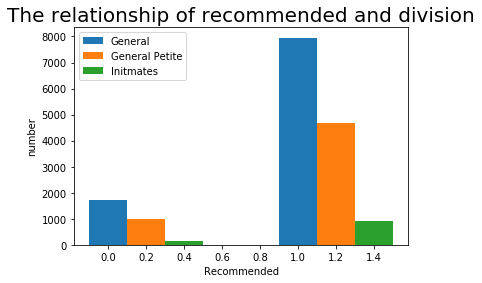

In [1172]:
RecX = Div_Rec.index
G = Div_Rec['General']
GP = Div_Rec['General Petite']
I = Div_Rec['Initmates']
width = 0.2

plt.title('The relationship of recommended and division',fontsize = 20)
plt.bar(RecX, G, width, label = 'General')
plt.bar(RecX + width, GP, width, label = 'General Petite')
plt.bar(RecX + 2*width, I, width, label = 'Initmates')
plt.xlabel('Recommended')
plt.ylabel('number')
plt.legend()
plt.show()

In [1173]:
Type_Rec = pd.crosstab(train['Type'],train['Recommended']).sort_values(by = 1, ascending = False)
Type_Rec

Recommended,0,1
Type,,
Dresses,865,3610
Knits,599,2794
Blouses,409,1720
Sweaters,195,812
Pants,163,780
Jeans,90,711
Fine gauge,122,641
Skirts,92,560
Jackets,71,425


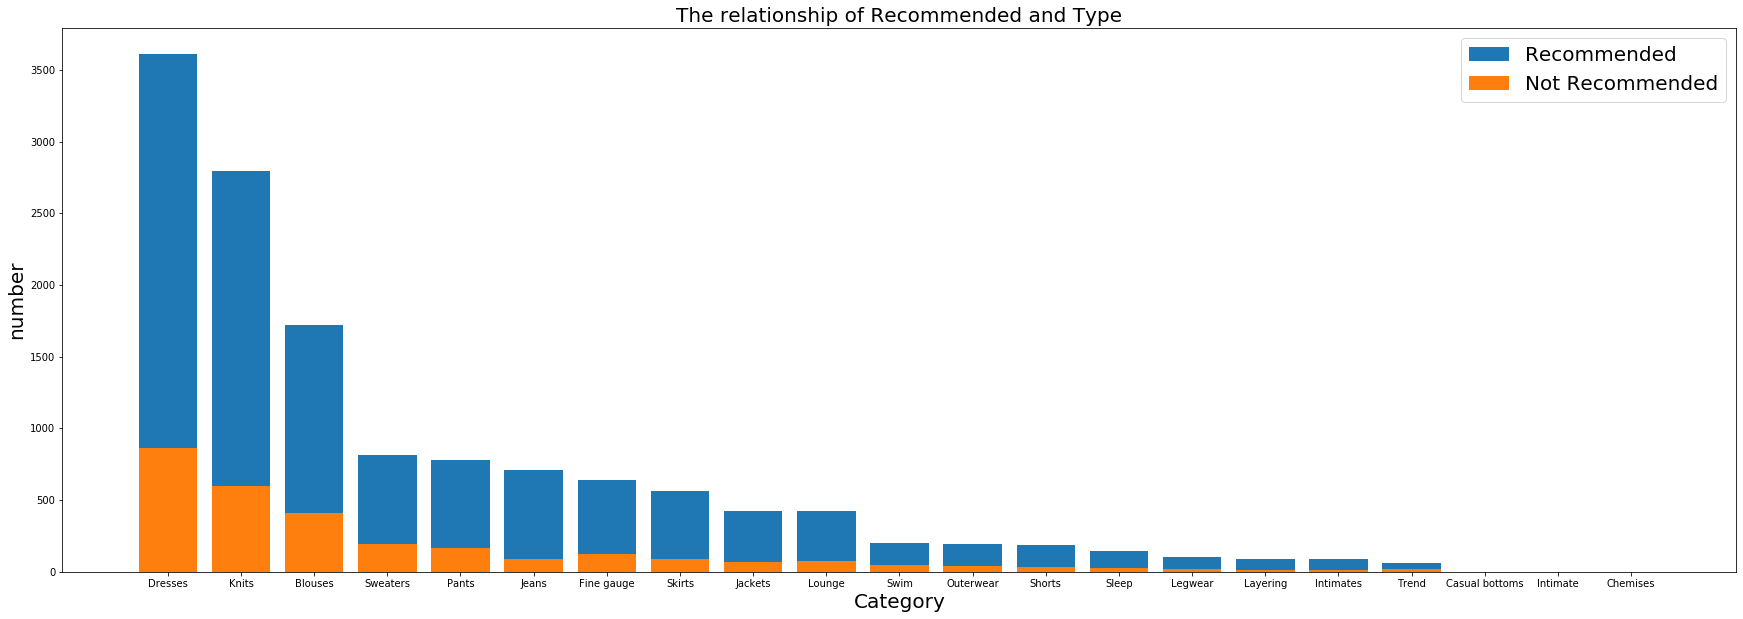

In [1174]:
plt.figure(figsize = (30,10))
TypeX = Type_Rec.index
Y1 = Type_Rec[1]
Y2 = Type_Rec[0]

plt.title('The relationship of Recommended and Type', fontsize = 20)
plt.bar(TypeX, Y1, label = 'Recommended')
plt.bar(TypeX, Y2, label = 'Not Recommended')

plt.xlabel('Category',fontsize = 20)
plt.ylabel('number',fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

In [1175]:
Dep_Rec = pd.crosstab(train['Department'],train['Recommended']).sort_values(by = 1, ascending = False)
Dep_Rec

Recommended,0,1
Department,,
Tops,1325,5967
Dresses,865,3610
Bottoms,381,2239
Intimate,189,1050
Jackets,114,618
Trend,19,62


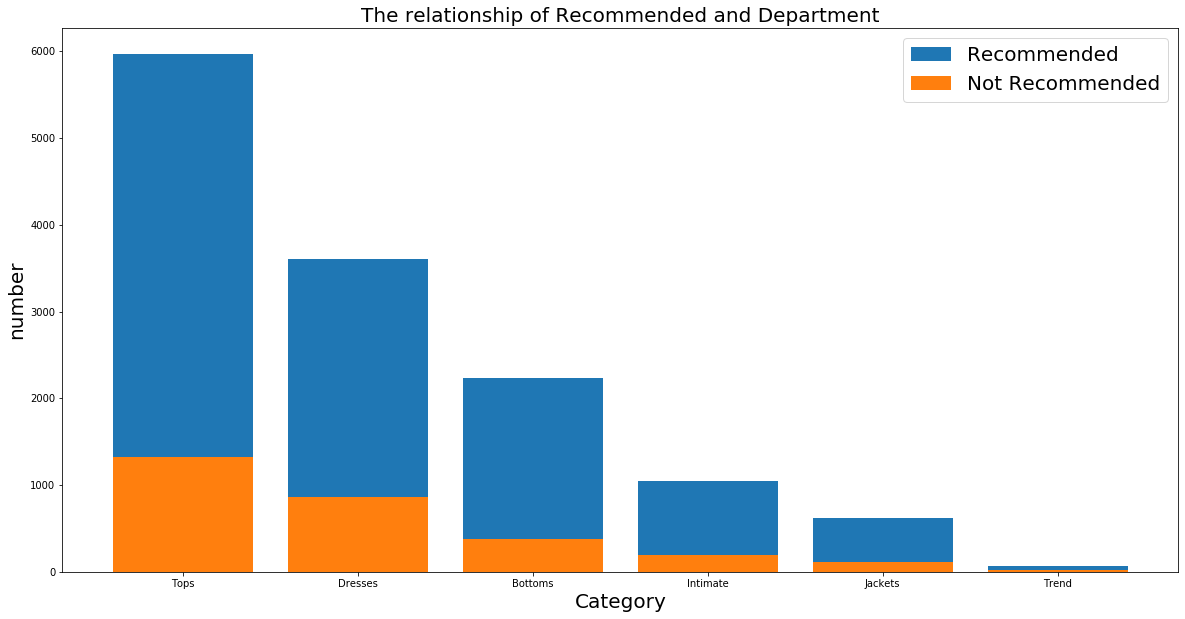

In [1176]:
plt.figure(figsize = (20,10))
RecX = Dep_Rec.index
Y1 = Dep_Rec[1]
Y2 = Dep_Rec[0]

plt.title('The relationship of Recommended and Department', fontsize = 20)
plt.bar(RecX, Y1, label = 'Recommended')
plt.bar(RecX, Y2, label = 'Not Recommended')

plt.xlabel('Category',fontsize = 20)
plt.ylabel('number',fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

In [1177]:
Dep_Rat = pd.crosstab(train['Department'],train['Rating']).sort_values(by = 1, ascending = False)
Dep_Rat

Rating,1,2,3,4,5
Department,,,,,
Tops,256,512,902,1579,4043
Dresses,168,324,578,988,2417
Bottoms,70,141,293,558,1558
Intimate,43,70,126,264,736
Jackets,37,40,55,147,453
Trend,5,7,14,21,34


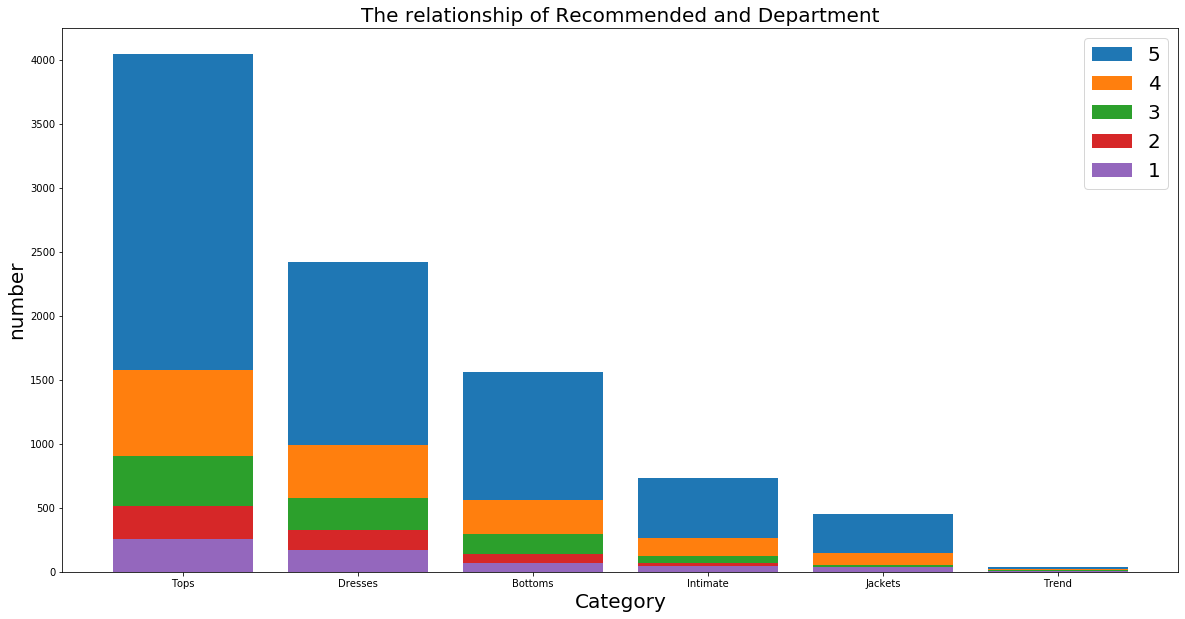

In [1178]:

plt.figure(figsize = (20,10))
RatX = Dep_Rat.index
Y1 = Dep_Rat[1]
Y2 = Dep_Rat[2]
Y3 = Dep_Rat[3]
Y4 = Dep_Rat[4]
Y5 = Dep_Rat[5]

plt.title('The relationship of Recommended and Department', fontsize = 20)


plt.bar(RatX, Y5, label = '5')
plt.bar(RatX, Y4, label = '4')
plt.bar(RatX, Y3, label = '3')
plt.bar(RatX, Y2, label = '2')
plt.bar(RatX, Y1, label = '1')

plt.xlabel('Category',fontsize = 20)
plt.ylabel('number',fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

In [1179]:
seperate = [0,20,30,40,50,60,70,80,100]
train['Age_interval'] = pd.cut(train['Age'],seperate).astype(str)

In [1180]:
Age_Dep = pd.crosstab(train['Age_interval'],train['Department'])
Age_Dep

Department,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Age_interval,,,,,,
"(0, 20]",17,30,11,3,46,1
"(20, 30]",324,655,227,95,905,6
"(30, 40]",910,1610,471,251,2291,29
"(40, 50]",684,1119,263,151,1889,23
"(50, 60]",439,660,156,129,1305,12
"(60, 70]",218,339,92,87,728,10
"(70, 80]",24,43,10,13,92,0
"(80, 100]",4,19,9,3,36,0


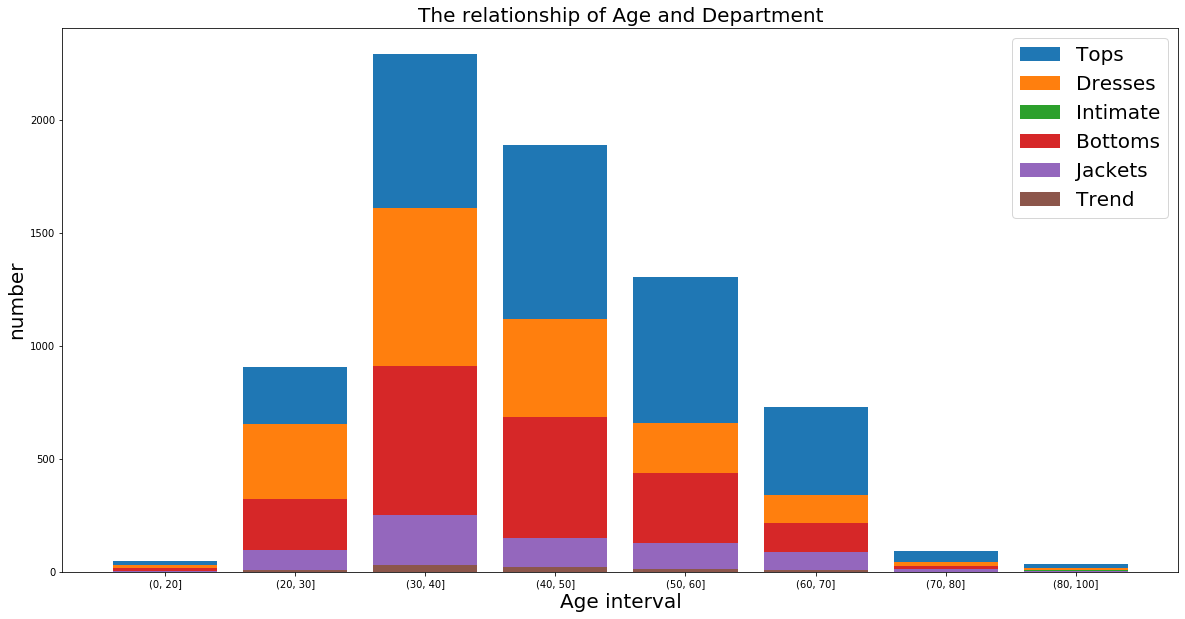

In [1181]:
plt.figure(figsize = (20,10))
AgeX = Age_Dep.index
Y1 = Age_Dep['Trend']
Y2 = Age_Dep['Jackets']
Y3 = Age_Dep['Bottoms']
Y4 = Age_Dep['Intimate']
Y5 = Age_Dep['Dresses']
Y6 = Age_Dep['Tops']

plt.title('The relationship of Age and Department', fontsize = 20)

plt.bar(AgeX, Y6, label = 'Tops')
plt.bar(AgeX, Y5, label = 'Dresses')
plt.bar(AgeX, Y4, label = 'Intimate')
plt.bar(AgeX, Y3, label = 'Bottoms')
plt.bar(AgeX, Y2, label = 'Jackets')
plt.bar(AgeX, Y1, label = 'Trend')

plt.xlabel('Age interval',fontsize = 20)
plt.ylabel('number',fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

In [1182]:
train["Age"].describe()
#review text, positive feedback counts, age

count    16439.000000
mean        43.195450
std         12.273085
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

## id加总，取一下rating的平均，取top10的产品id，

# positive sentiments

In [1183]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

<function matplotlib.pyplot.show(*args, **kw)>

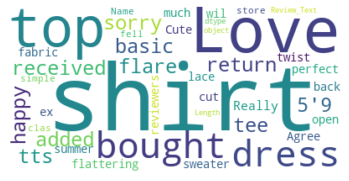

In [1184]:
good_reviews = train[train["Recommended"]==1]["Review_Text"]

fig,ax=plt.subplots()
wordcloud= WordCloud(background_color = "white", collocations= False, max_words= 100).generate(str(good_reviews))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

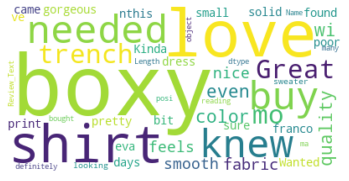

In [1185]:
bad_reviews = train[train["Recommended"]==0]["Review_Text"]

fig,ax=plt.subplots()
wordcloud= WordCloud(background_color = "white", collocations=False, max_words= 100).generate(str(bad_reviews))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show
###boxy 

In [1186]:
train['Rating'].describe()

count    16439.000000
mean         4.203662
std          1.106181
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

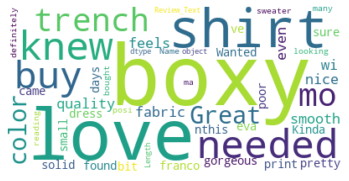

In [1187]:
###recommended=0,rating<mean
badrat_review = train[(train['Rating']< train['Rating'].mean()) &(train['Recommended']==0) ]['Review_Text']
fig,ax = plt.subplots()
wcloud = WordCloud(background_color="white",collocations=False,max_words=100).generate(str(badrat_review))
plt.imshow(wcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

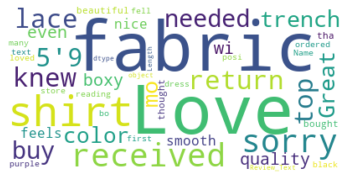

In [1188]:
###rating<mean
badrat_review = train[(train['Rating']<train['Rating'].mean() )]['Review_Text']
fig,ax = plt.subplots()
wcloud = WordCloud(background_color="white",collocations=False,max_words=100).generate(str(badrat_review))
plt.imshow(wcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

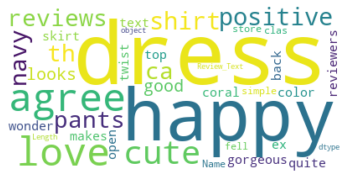

In [1189]:
age3040_reviews = train[train["Age_interval"] == "(30, 40]"]["Review_Text"]

fig,ax=plt.subplots()
wordcloud= WordCloud(background_color = "white", collocations=False, max_words= 20000).generate(str(age3040_reviews))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show

# benchmark model

In [1190]:
print(train.shape)
print(test.shape)

(16439, 12)
(6803, 10)


In [1191]:
from sklearn.feature_extraction.text import CountVectorizer

bench=train["Review_Text"].tolist()
benchtest=test["Review_Text"].tolist()
bench_vect= CountVectorizer(max_features=500)

bench_train=bench_vect.fit_transform(bench).toarray()
bench_test=bench_vect.transform(benchtest).toarray()

print(bench_train.shape)
print(bench_test.shape)

(16439, 500)
(6803, 500)


In [1192]:
bench_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [1193]:
## dataframe
x_dfbench_train=pd.DataFrame(bench_train,columns = bench_vect.get_feature_names())
y_dfbench_train=train["Recommended"]
x_dfbench_train

,10,12,26,able,about,above,absolutely,across,actually,add,...,would,wouldn,xl,xs,xxs,year,yet,you,your,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16434,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16435,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16436,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1194]:
x_dfbench_test=pd.DataFrame(bench_test,columns = bench_vect.get_feature_names())

In [1195]:
print(x_dfbench_train.shape)
print(x_dfbench_test.shape)

(16439, 500)
(6803, 500)


## build benchmark model

In [1196]:
from sklearn.linear_model import LogisticRegression

bm = LogisticRegression(solver='liblinear')

## cross Validation

In [1197]:
from sklearn.model_selection import cross_validate
cv_bench_outcome = cross_validate(bm,
                                 x_dfbench_train,
                                 y_dfbench_train,
                                 scoring=["f1","accuracy",'precision','recall','roc_auc'],
                                 cv=5,
                                 n_jobs=1,
                                 return_train_score=True)



In [1198]:
cv_bench_outcome

{'fit_time': array([0.34179163, 0.28786397, 0.28930688, 0.30933595, 0.29005814]),
 'score_time': array([0.03367138, 0.03403616, 0.02942991, 0.02919102, 0.02942896]),
 'test_f1': array([0.93314111, 0.9304755 , 0.93280347, 0.92827611, 0.93294672]),
 'train_f1': array([0.94007135, 0.941012  , 0.93986557, 0.94072002, 0.94007761]),
 'test_accuracy': array([0.88719976, 0.88260341, 0.88686131, 0.87861272, 0.88743535]),
 'train_accuracy': array([0.89908745, 0.90053988, 0.89863889, 0.90009124, 0.89902676]),
 'test_precision': array([0.91194082, 0.90854731, 0.91333569, 0.90469516, 0.91634033]),
 'train_precision': array([0.92049173, 0.92026109, 0.91941748, 0.92029305, 0.9198234 ]),
 'test_recall': array([0.95535055, 0.95348837, 0.95311923, 0.95311923, 0.95016611]),
 'train_recall': array([0.96050203, 0.96272031, 0.96124389, 0.96207437, 0.96124389]),
 'test_roc_auc': array([0.90733929, 0.90627672, 0.91041854, 0.89931039, 0.89543857]),
 'train_roc_auc': array([0.93382394, 0.93313039, 0.93181946, 0

In [1199]:
df_cv=pd.DataFrame.from_dict(cv_bench_outcome)
df_cv

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,0.341792,0.033671,0.933141,0.940071,0.887200,0.899087,0.911941,0.920492,0.955351,0.960502,0.907339,0.933824
1,0.287864,0.034036,0.930476,0.941012,0.882603,0.900540,0.908547,0.920261,0.953488,0.962720,0.906277,0.933130
2,0.289307,0.029430,0.932803,0.939866,0.886861,0.898639,0.913336,0.919417,0.953119,0.961244,0.910419,0.931819
3,0.309336,0.029191,0.928276,0.940720,0.878613,0.900091,0.904695,0.920293,0.953119,0.962074,0.899310,0.934091
4,0.290058,0.029429,0.932947,0.940078,0.887435,0.899027,0.916340,0.919823,0.950166,0.961244,0.895439,0.935410


In [1200]:
df_cv.mean()  ###test_f1=0.930648,test_accuracy      0.883083

fit_time           0.303671
score_time         0.031151
test_f1            0.931529
train_f1           0.940349
test_accuracy      0.884543
train_accuracy     0.899477
test_precision     0.910972
train_precision    0.920057
test_recall        0.953049
train_recall       0.961557
test_roc_auc       0.903757
train_roc_auc      0.933655
dtype: float64

## Improve MODEL

In [1201]:
impr_train=train.copy()
impr_test=test.copy()

In [1202]:
print(impr_test.shape)
print(impr_train.shape)

(6803, 10)
(16439, 12)


In [1203]:
impr_train.columns

Index(['ID', 'Product_ID', 'Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommended', 'Positive_Feedback_Count', 'Division', 'Department',
       'Type', 'Age_interval'],
      dtype='object')

## positive and negative words 

In [1204]:
import re
positivewords_counts=[]
for k in impr_train["Review_Title"]:
    positivewords_train=re.findall(r'(gorgeous|good|great|perfect|nice|OMG|happy|agree|flattering|awesome)',k)
    count_positivewords_train = len(positivewords_train)
    positivewords_counts.append(count_positivewords_train)
impr_train["positivewords_Counts"]=positivewords_counts


In [1205]:
import re
positivewords_counts=[]
for k in impr_test["Review_Title"]:
    positivewords_train=re.findall(r'(gorgeous|positive|great|perfect|nice|OMG|happy|agree|flattering|awesome)',k)
    count_positivewords_train = len(positivewords_train)
    positivewords_counts.append(count_positivewords_train)
impr_test["positivewords_Counts"]=positivewords_counts

In [1206]:
a = pd.crosstab(impr_train['Recommended'],impr_train['positivewords_Counts']).sort_values(by=1,ascending = False)
a

positivewords_Counts,0,1,2
Recommended,,,
1,12791,747,8
0,2739,153,1


In [1207]:
negativewords_counts=[]
for f in impr_train["Review_Text"]:
    badwords_train=re.findall(r'(unflattring|disappointed|ugly|poor|bad|odd|nothing|unflattering|weird|unhappy|awful|awkward|boxy)',f)
    count_badwords_train = len(badwords_train)
    negativewords_counts.append(count_badwords_train)
impr_train["Negativewords_Counts"]=negativewords_counts



In [1208]:
negativewords_counts=[]
for f in impr_test["Review_Text"]:
    badwords_train=re.findall(r'(unflattring|disappointed|ugly|poor|bad|odd|nothing|unflattering|weird|unhappy|awful|awkward|boxy)',f)
    count_badwords_train = len(badwords_train)
    negativewords_counts.append(count_badwords_train)
impr_test["Negativewords_Counts"]=negativewords_counts

In [1209]:
a = pd.crosstab(impr_train['Recommended'],impr_train['Negativewords_Counts']).sort_values(by=1,ascending = False)
a

Negativewords_Counts,0,1,2,3,4,5
Recommended,,,,,,
1,12476,961,95,13,0,1
0,1895,784,174,35,4,1


## body size，general:5'4---5'10, petite means under 5‘4

In [1210]:
##general
a=[]
for f in impr_train["Review_Text"]:
    b=re.findall(r'(5\'10|5\'9.5|5\'9|5\'8.5|5\'8|5\'7.5|5\'7|5\'6.5|5\'6|5\'5.5|5\'5|5\'4.5)',f)
    c= len(b)
    a.append(c)
impr_train["generalfit_Counts"]=a


In [1211]:
a=[]
for f in impr_test["Review_Text"]:
    b=re.findall(r'(5\'10|5\'9.5|5\'9|5\'8.5|5\'8|5\'7.5|5\'7|5\'6.5|5\'6|5\'5.5|5\'5|5\'4.5)',f)
    c= len(b)
    a.append(c)
impr_test["generalfit_Counts"]=a

In [1212]:
k = pd.crosstab(impr_train['Recommended'],impr_train['generalfit_Counts']).sort_values(by=1,ascending = False)
k

generalfit_Counts,0,1,2,3
Recommended,,,,
1,12385,1148,12,1
0,2648,242,2,1


In [1213]:
###petite
a=[]
for f in impr_train["Review_Text"]:
    b=re.findall(r'(5\'4|5\'3.5|5\'3|5\'2.5|5\'2|5\'2.5|5\'1)',f)
    c= len(b)
    a.append(c)
impr_train["petitefit_Counts"]=a

In [1214]:
a=[]
for f in impr_test["Review_Text"]:
    b=re.findall(r'(5\'4|5\'3.5|5\'3|5\'2.5|5\'2|5\'2.5|5\'1)',f)
    c= len(b)
    a.append(c)
impr_test["petitefit_Counts"]=a

In [1215]:
k = pd.crosstab(impr_train['Recommended'],impr_train['petitefit_Counts']).sort_values(by=1,ascending = False)
k

petitefit_Counts,0,1,2
Recommended,,,
1,12332,1205,9
0,2684,207,2


## age interval reclassification

In [1216]:
impr_train['Age_interval'].value_counts()

(30, 40]     5562
(40, 50]     4129
(50, 60]     2701
(20, 30]     2212
(60, 70]     1474
(70, 80]      182
(0, 20]       108
(80, 100]      71
Name: Age_interval, dtype: int64

In [1217]:
def level(val):
    if val<=20:
        return"Age_Others"
    if val <= 30:
        return "Age_2030"
    if val <= 40:
        return "Age_3040"
    if val <= 50:
        return "Age_4050"
    if val <= 60:
        return "Age_5060"
    elif val <= 70:
        return "Age_6070"
    else:
        return "Age_Others"
    
a=['Age']

for i in a:
    impr_train[i] = impr_train[i].apply(level)

In [1218]:
def level(val):
    if val<=20:
        return"Age_Others"
    if val <= 30:
        return "Age_2030"
    if val <= 40:
        return "Age_3040"
    if val <= 50:
        return "Age_4050"
    if val <= 60:
        return "Age_5060"
    elif val <= 70:
        return "Age_6070"
    else:
        return "Age_Others"
    
a=['Age']

for i in a:
    impr_test[i] = impr_test[i].apply(level)

In [1219]:
impr_train['Age'].value_counts()

Age_3040      5562
Age_4050      4129
Age_5060      2701
Age_2030      2212
Age_6070      1474
Age_Others     361
Name: Age, dtype: int64

## Rating accuracy

In [1220]:
###
impr_train['Rating_accuracy']=impr_train['Rating'].map({5:2,4:1,3:0,2:-1,1:-2})
impr_train['Rating_accuracy']=impr_train['Rating_accuracy']*(impr_train['Positive_Feedback_Count']+1)


In [1221]:
impr_test['Rating_accuracy']=impr_test['Rating'].map({5:2,4:1,3:0,2:-1,1:-2})
impr_test['Rating_accuracy']=impr_test['Rating_accuracy']*(impr_test['Positive_Feedback_Count']+1)

In [1222]:
gggg= pd.crosstab(impr_train['Rating_accuracy'],impr_train['Recommended']).sort_values(by=1,ascending=False)
gggg

Recommended,0,1
Rating_accuracy,,
2,30,5086
4,9,1823
1,46,1724
6,4,942
0,1166,802
...,...,...
-25,2,0
-27,3,0
-28,13,0


In [1223]:
impr_train['Rating_accuracy'].describe()

count    16439.000000
mean         3.871282
std         10.192322
min       -218.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        236.000000
Name: Rating_accuracy, dtype: float64

In [1224]:
impr_train.columns

Index(['ID', 'Product_ID', 'Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommended', 'Positive_Feedback_Count', 'Division', 'Department',
       'Type', 'Age_interval', 'positivewords_Counts', 'Negativewords_Counts',
       'generalfit_Counts', 'petitefit_Counts', 'Rating_accuracy'],
      dtype='object')

In [1225]:
impr_train["Division"].value_counts()

General           9681
General Petite    5680
Initmates         1078
Name: Division, dtype: int64

In [1226]:
impr_train["Department"].value_counts()

Tops        7292
Dresses     4475
Bottoms     2620
Intimate    1239
Jackets      732
Trend         81
Name: Department, dtype: int64

In [1227]:
impr_train["Type"].value_counts()

Dresses           4475
Knits             3393
Blouses           2129
Sweaters          1007
Pants              943
Jeans              801
Fine gauge         763
Skirts             652
Jackets            496
Lounge             493
Swim               249
Outerwear          236
Shorts             223
Sleep              166
Legwear            119
Intimates          107
Layering           103
Trend               81
Casual bottoms       1
Chemises             1
Intimate             1
Name: Type, dtype: int64

In [1228]:
##property_type category
impr_train["Type"] = np.where(impr_train['Type'].str.contains('Dresses'), "Dresses",
                            (np.where(impr_train['Type'].str.contains('Knits'),"Knits",
                            (np.where(impr_train['Type'].str.contains('Blouses'),"Blouses",
                            (np.where(impr_train['Type'].str.contains('Sweaters'), "Sweaters",
                            (np.where(impr_train['Type'].str.contains('Pants'), "Pants",
                            (np.where(impr_train['Type'].str.contains('Jeans'), "Jeans",
                            (np.where(impr_train['Type'].str.contains('Fine gauge'), "Fine gauge",
                            (np.where(impr_train['Type'].str.contains('Skirts'), "Skirts",
                            (np.where(impr_train['Type'].str.contains('Lounge'), "Lounge",
                            (np.where(impr_train['Type'].str.contains('Jackets'), "Jackets",
                             "Other")))))))))))))))))))

##check
impr_train['Type'].value_counts() 


Dresses       4475
Knits         3393
Blouses       2129
Other         1287
Sweaters      1007
Pants          943
Jeans          801
Fine gauge     763
Skirts         652
Jackets        496
Lounge         493
Name: Type, dtype: int64

In [1229]:
impr_test["Type"] = np.where(impr_test['Type'].str.contains('Dresses'), "Dresses",
                            (np.where(impr_test['Type'].str.contains('Knits'),"Knits",
                            (np.where(impr_test['Type'].str.contains('Blouses'),"Blouses",
                            (np.where(impr_test['Type'].str.contains('Sweaters'), "Sweaters",
                            (np.where(impr_test['Type'].str.contains('Pants'), "Pants",
                            (np.where(impr_test['Type'].str.contains('Jeans'), "Jeans",
                            (np.where(impr_test['Type'].str.contains('Fine gauge'), "Fine gauge",
                            (np.where(impr_test['Type'].str.contains('Skirts'), "Skirts",
                            (np.where(impr_test['Type'].str.contains('Lounge'), "Lounge",
                            (np.where(impr_test['Type'].str.contains('Jackets'), "Jackets",
                             "Other")))))))))))))))))))

##check
impr_test['Type'].value_counts() 


Dresses       1789
Knits         1384
Blouses        934
Other          511
Pants          431
Sweaters       414
Jeans          333
Fine gauge     331
Skirts         283
Jackets        204
Lounge         189
Name: Type, dtype: int64

In [1230]:
impr_test["Type"] = np.where(impr_test['Type'].str.contains('Dresses'), "Dresses",
                            (np.where(impr_test['Type'].str.contains('Knits'),"Knits",
                            (np.where(impr_test['Type'].str.contains('Blouses'),"Blouses",
                            (np.where(impr_test['Type'].str.contains('Sweaters'), "Sweaters",
                            (np.where(impr_test['Type'].str.contains('Pants'), "Pants",
                            (np.where(impr_test['Type'].str.contains('Jeans'), "Jeans",
                            (np.where(impr_test['Type'].str.contains('Fine gauge'), "Fine gauge",
                            (np.where(impr_test['Type'].str.contains('Skirts'), "Skirts",
                            (np.where(impr_test['Type'].str.contains('Lounge'), "Lounge",
                            (np.where(impr_test['Type'].str.contains('Jackets'), "Jackets",
                             "Other")))))))))))))))))))

##check
impr_test['Type'].value_counts() 

Dresses       1789
Knits         1384
Blouses        934
Other          511
Pants          431
Sweaters       414
Jeans          333
Fine gauge     331
Skirts         283
Jackets        204
Lounge         189
Name: Type, dtype: int64

In [1231]:
###Rating
def level(val):
    if val <4:
        return "Below_Average"
    elif val ==4:
        return "Good"
    else:
        return "Excellent"

In [1232]:
impr_train['Rating'].value_counts()

5    9241
4    3557
3    1968
2    1094
1     579
Name: Rating, dtype: int64

In [1233]:
rating=['Rating']

for i in rating:
    impr_train[i] = impr_train[i].apply(level)

In [1234]:
def level(val):
    if val <4:
        return "Below_Average"
    elif val ==4:
        return "Good"
    else:
        return "Excellent"
    
rating=['Rating']

for i in rating:
    impr_test[i] = impr_test[i].apply(level)

In [1235]:
impr_train.shape

(16439, 17)

In [1236]:
corr_train=impr_train.drop(['ID','Review_Title',"Review_Text",'Age_interval'],axis = 1)
ttt_train = impr_train.drop(['ID','Review_Title',"Review_Text",'Recommended','Age_interval'],axis = 1)
ttt_test=impr_test.drop(['ID','Review_Title',"Review_Text"],axis = 1)
print(ttt_train.shape)
print(ttt_test.shape)

(16439, 12)
(6803, 12)


In [1237]:
ttt_train.isna().sum()

Product_ID                 0
Age                        0
Rating                     0
Positive_Feedback_Count    0
Division                   0
Department                 0
Type                       0
positivewords_Counts       0
Negativewords_Counts       0
generalfit_Counts          0
petitefit_Counts           0
Rating_accuracy            0
dtype: int64

In [1238]:
train_dm=pd.get_dummies(ttt_train,drop_first=True).copy()
test_dm=pd.get_dummies(ttt_test,drop_first=True).copy()
corrdm_train_dm=pd.get_dummies(corr_train,drop_first= True).copy()
train_dm.shape

(16439, 31)

In [1239]:
train_dm.isna().sum()

Product_ID                 0
Positive_Feedback_Count    0
positivewords_Counts       0
Negativewords_Counts       0
generalfit_Counts          0
petitefit_Counts           0
Rating_accuracy            0
Age_Age_3040               0
Age_Age_4050               0
Age_Age_5060               0
Age_Age_6070               0
Age_Age_Others             0
Rating_Excellent           0
Rating_Good                0
Division_General Petite    0
Division_Initmates         0
Department_Dresses         0
Department_Intimate        0
Department_Jackets         0
Department_Tops            0
Department_Trend           0
Type_Dresses               0
Type_Fine gauge            0
Type_Jackets               0
Type_Jeans                 0
Type_Knits                 0
Type_Lounge                0
Type_Other                 0
Type_Pants                 0
Type_Skirts                0
Type_Sweaters              0
dtype: int64

In [1240]:
train_dm.columns

Index(['Product_ID', 'Positive_Feedback_Count', 'positivewords_Counts',
       'Negativewords_Counts', 'generalfit_Counts', 'petitefit_Counts',
       'Rating_accuracy', 'Age_Age_3040', 'Age_Age_4050', 'Age_Age_5060',
       'Age_Age_6070', 'Age_Age_Others', 'Rating_Excellent', 'Rating_Good',
       'Division_General Petite', 'Division_Initmates', 'Department_Dresses',
       'Department_Intimate', 'Department_Jackets', 'Department_Tops',
       'Department_Trend', 'Type_Dresses', 'Type_Fine gauge', 'Type_Jackets',
       'Type_Jeans', 'Type_Knits', 'Type_Lounge', 'Type_Other', 'Type_Pants',
       'Type_Skirts', 'Type_Sweaters'],
      dtype='object')

## hot map

In [1241]:

corr= corrdm_train_dm.corr()["Recommended"].sort_values()
corr

Negativewords_Counts      -0.308938
Positive_Feedback_Count   -0.068610
Type_Dresses              -0.027804
Department_Dresses        -0.027804
Product_ID                -0.016326
Age_Age_4050              -0.015972
Age_Age_3040              -0.015928
Department_Tops           -0.013416
Type_Sweaters             -0.011847
Department_Trend          -0.010826
Division_General Petite   -0.000810
Type_Knits                -0.000745
generalfit_Counts          0.000896
Type_Pants                 0.002028
positivewords_Counts       0.004512
Type_Other                 0.006833
Type_Fine gauge            0.009321
Department_Jackets         0.011478
Age_Age_Others             0.011478
Type_Lounge                0.013824
Type_Jackets               0.015210
Department_Intimate        0.017575
Division_Initmates         0.017882
Type_Skirts                0.018614
petitefit_Counts           0.023221
Age_Age_5060               0.024716
Age_Age_6070               0.028739
Type_Jeans                 0

Text(0.5, 1, 'relationships')

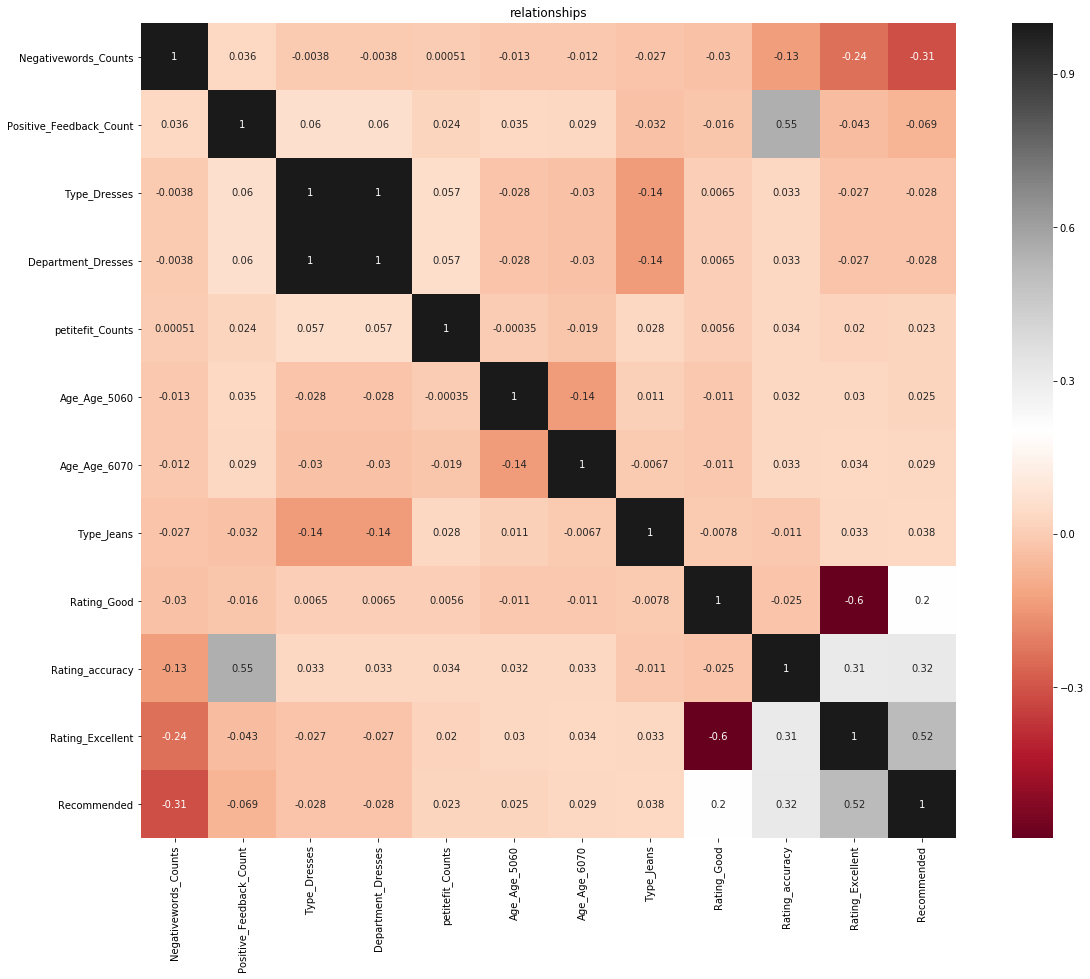

In [1242]:
train_dm_corr= corrdm_train_dm[corr.loc[(corr > 0.02)|(corr< -0.02)].index]
plt.subplots(figsize=(20,15))
sns.heatmap(train_dm_corr.corr(), square=True, annot= True, cmap="RdGy")
plt.title("relationships")

## encoding

In [1243]:
## get continuous variables

conti=[]
dummy=[]

for x in train_dm.columns[2:]:
    if train_dm[x].value_counts().shape[0] > 2:
        conti.append(x)
    else:
        dummy.append(x)
        
print("conti_var:{0}".format(conti))

print("********")

print("dummy_var:{0}".format(dummy))

conti_var:['positivewords_Counts', 'Negativewords_Counts', 'generalfit_Counts', 'petitefit_Counts', 'Rating_accuracy']
********
dummy_var:['Age_Age_3040', 'Age_Age_4050', 'Age_Age_5060', 'Age_Age_6070', 'Age_Age_Others', 'Rating_Excellent', 'Rating_Good', 'Division_General Petite', 'Division_Initmates', 'Department_Dresses', 'Department_Intimate', 'Department_Jackets', 'Department_Tops', 'Department_Trend', 'Type_Dresses', 'Type_Fine gauge', 'Type_Jackets', 'Type_Jeans', 'Type_Knits', 'Type_Lounge', 'Type_Other', 'Type_Pants', 'Type_Skirts', 'Type_Sweaters']


In [1244]:
sta=train_dm.describe()
sta.loc["skew",:]=train_dm.skew()
sta.loc['kurt',:]=train_dm.kurt()
sta[conti].round(3)

,positivewords_Counts,Negativewords_Counts,generalfit_Counts,petitefit_Counts,Rating_accuracy
count,16439.000,16439.000,16439.000,16439.000,16439.000
mean,0.056,0.149,0.087,0.087,3.871
std,0.232,0.427,0.286,0.285,10.192
min,0.000,0.000,0.000,0.000,-218.000
25%,0.000,0.000,0.000,0.000,1.000
50%,0.000,0.000,0.000,0.000,2.000
75%,0.000,0.000,0.000,0.000,4.000
max,2.000,5.000,3.000,2.000,236.000
skew,4.000,3.355,3.127,3.013,4.910
kurt,14.728,13.862,8.893,7.473,95.487


In [1245]:
from sklearn.feature_extraction.text import TfidfVectorizer
words=impr_train['Review_Text'].tolist()
wordstest=impr_test['Review_Text'].tolist()
tf_vector = TfidfVectorizer(max_features=1000,analyzer='word',
                            stop_words='english',ngram_range=(1,3),max_df =0.95,min_df=3)

train_tf=tf_vector.fit_transform(words).toarray()
test_tf=tf_vector.transform(wordstest).toarray()

print(train_tf.shape)
print(test_tf.shape)


(16439, 1000)
(6803, 1000)


In [1246]:
#dataframe-train
b_train_tf = pd.DataFrame(train_tf,columns = tf_vector.get_feature_names(),index = train_dm.index)
print(b_train_tf.shape)
#x

(16439, 1000)


In [1247]:
#dataframe-train
x_train_tf = pd.concat([b_train_tf,train_dm],axis =1,ignore_index = False, verify_integrity = True)
#y
y_train_tf = impr_train['Recommended']
print(x_train_tf.shape)

(16439, 1031)


In [1248]:
x_train_tf.isna().sum().sort_values()

10                      0
really wanted           0
reason                  0
received                0
received compliments    0
                       ..
great dress             0
great fit               0
great jeans             0
hits                    0
Type_Sweaters           0
Length: 1031, dtype: int64

In [1249]:
#变为dataframe-test
x_test_tf = pd.DataFrame(test_tf,columns = tf_vector.get_feature_names(),index = test_dm.index)
print(x_test_tf.shape)
#x
x_test_tf = pd.concat([x_test_tf,test_dm],axis = 1, ignore_index = False, verify_integrity = True)
print(x_test_tf.shape)


(6803, 1000)
(6803, 1031)


In [1250]:
x_test_tf.isna().sum().sort_values()

10                      0
really wanted           0
reason                  0
received                0
received compliments    0
                       ..
great dress             0
great fit               0
great jeans             0
hits                    0
Type_Sweaters           0
Length: 1031, dtype: int64

In [1251]:
#logisticregression CV 
from sklearn.model_selection import GridSearchCV
import numpy as np
c_para=10.0**np.arange(-2,2)
c_para

array([ 0.01,  0.1 ,  1.  , 10.  ])

In [1252]:
%%time

para_grid = [{'penalty':['l1','l2'],'C':c_para,'solver':['liblinear'],
               'multi_class':['ovr']}]


final_grid = GridSearchCV(LogisticRegression( random_state=1,class_weight='balanced'),
                          para_grid,cv=10,verbose=1,n_jobs=-1,scoring='f1')


final_fit = final_grid.fit(x_train_tf,y_train_tf)
print('the best parameter:', final_fit.best_params_)
print("***********************")
print('the best score:', final_fit.best_score_)
print("***********************")
print('the best estimator:', final_fit.best_estimator_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   29.5s finished


the best parameter: {'C': 1.0, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
***********************
the best score: 0.9617210325646283
***********************
the best estimator: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
CPU times: user 1.74 s, sys: 647 ms, total: 2.39 s
Wall time: 30.1 s


In [1253]:
final_gridcv = final_fit.best_estimator_
print(final_gridcv)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [1254]:
#cross-val_score
from sklearn.model_selection import cross_val_score
score = np.mean(cross_val_score(final_gridcv,x_train_tf,y_train_tf, cv=5, scoring= 'f1'))

print('logitcv_f1:{0}'.format(score))
print('-----------------------------------------------------------------------------------')
cv_outcomes = cross_validate(final_gridcv,x_train_tf,y_train_tf,scoring=['f1','precision','roc_auc','accuracy','recall'],cv=5,n_jobs=-1,return_train_score=True)
pd.DataFrame.from_dict(cv_outcomes).mean()

logitcv_f1:0.9616420553814905
-----------------------------------------------------------------------------------


fit_time           0.752565
score_time         0.103631
test_f1            0.961642
train_f1           0.962468
test_precision     0.990154
train_precision    0.991372
test_roc_auc       0.974046
train_roc_auc      0.984481
test_accuracy      0.938561
train_accuracy     0.939899
test_recall        0.934741
train_recall       0.935202
dtype: float64

## Interpreting

In [1255]:
final_gridcv.coef_.ravel()

array([-0.64241659,  1.47212565,  0.32539453, ..., -0.60550184,
       -0.19161586,  0.05956635])

In [1256]:
final_model_table=pd.Series(final_gridcv.coef_.ravel(),
                            index=x_train_tf.columns).sort_values(ascending= True, inplace=False)
print(final_model_table)
print('**************')
print(final_model_table.shape)

returned           -2.326318
returning          -2.092810
unfortunately      -1.957545
wanted love        -1.899706
runs small         -1.862950
                      ...   
love                2.062313
little              2.128097
medium              2.182872
Rating_Good         3.742503
Rating_Excellent    6.017152
Length: 1031, dtype: float64
**************
(1031,)


In [1257]:
combine=final_model_table[:10].append(final_model_table[-10:])
combine

returned           -2.326318
returning          -2.092810
unfortunately      -1.957545
wanted love        -1.899706
runs small         -1.862950
brand              -1.831278
sad                -1.820110
didn work          -1.694697
stiff              -1.676795
material           -1.674285
really like         1.687178
bit                 1.830936
unique              1.867590
casual              1.872844
bust                1.947519
love                2.062313
little              2.128097
medium              2.182872
Rating_Good         3.742503
Rating_Excellent    6.017152
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

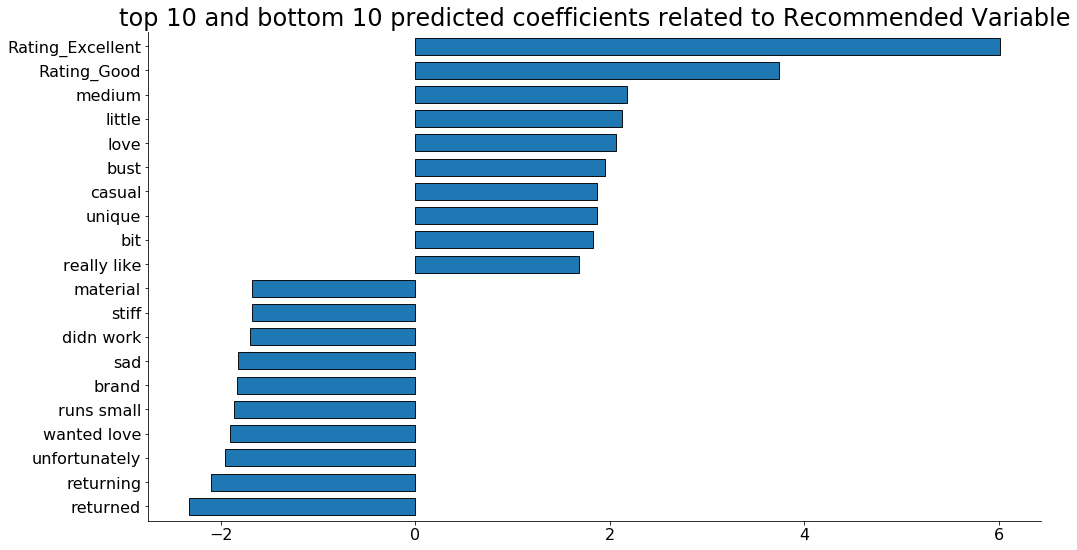

In [1258]:
fig,ax=plt.subplots(figsize=(16,9))
combine.plot(kind="barh", edgecolor="black", width=0.7,linewidth=0.9, alpha=1, ax=ax, fontsize=16)
ax.set_title("top 10 and bottom 10 predicted coefficients related to Recommended Variable", fontsize=24)
sns.despine()
plt.show

In [1259]:
Type_classification=[]
for k in x_train_tf.columns:
    if "Type"in k.split('_'):
        Type_classification.append(k)
print(Type_classification)

['Type_Dresses', 'Type_Fine gauge', 'Type_Jackets', 'Type_Jeans', 'Type_Knits', 'Type_Lounge', 'Type_Other', 'Type_Pants', 'Type_Skirts', 'Type_Sweaters']


In [1260]:
Type=final_model_table.loc[Type_classification].sort_values()
Type

Type_Pants        -0.605502
Type_Other        -0.349367
Type_Skirts       -0.191616
Type_Dresses      -0.145089
Type_Sweaters      0.059566
Type_Jeans         0.086511
Type_Lounge        0.117577
Type_Knits         0.136289
Type_Jackets       0.162894
Type_Fine gauge    0.191854
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

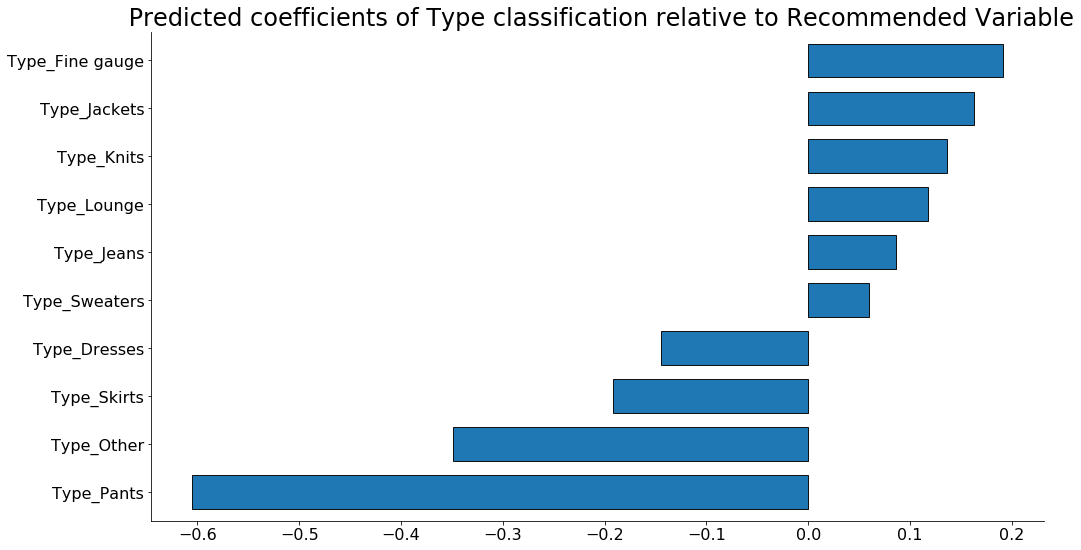

In [1261]:
fig,ax=plt.subplots(figsize=(16,9))
Type.plot(kind="barh", edgecolor="black", width=0.7,linewidth=0.9, alpha=1, ax=ax, fontsize=16)
ax.set_title(" Predicted coefficients of Type classification relative to Recommended Variable", fontsize=24)
sns.despine()
plt.show

In [1262]:
Age_classification=[]
for k in x_train_tf.columns:
    if "Age"in k.split('_'):
        Age_classification.append(k)
print(Age_classification)

['Age_Age_3040', 'Age_Age_4050', 'Age_Age_5060', 'Age_Age_6070', 'Age_Age_Others']


In [1263]:
Age=final_model_table.loc[Age_classification].sort_values()
Age

Age_Age_4050      0.062473
Age_Age_3040      0.099451
Age_Age_5060      0.132286
Age_Age_Others    0.165805
Age_Age_6070      0.296840
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

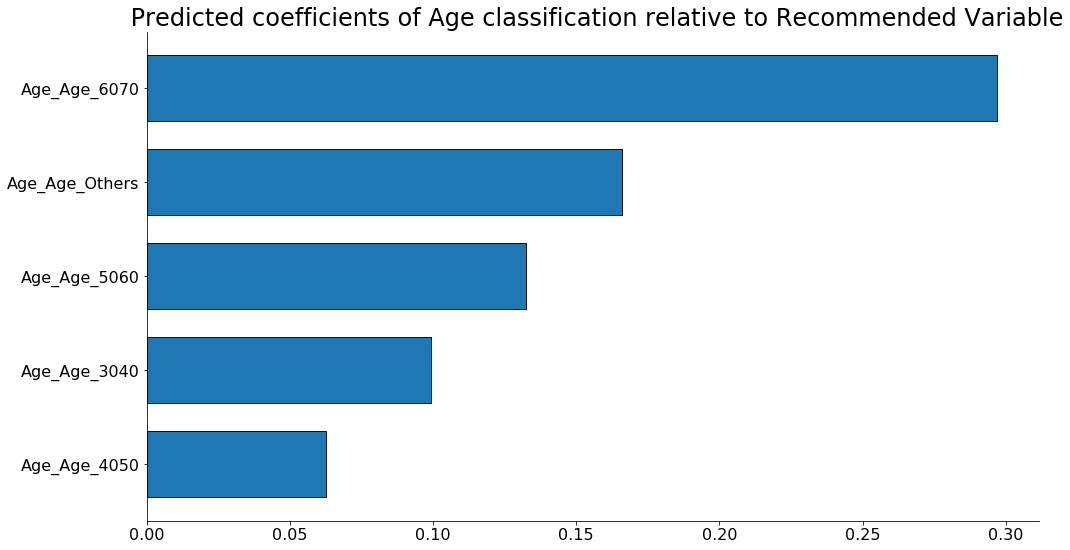

In [1264]:
fig,ax=plt.subplots(figsize=(16,9))
Age.plot(kind="barh", edgecolor="black", width=0.7,linewidth=0.9, alpha=1, ax=ax, fontsize=16)
ax.set_title(" Predicted coefficients of Age classification relative to Recommended Variable", fontsize=24)
sns.despine()
plt.show

In [1265]:
Division_classification=[]
for k in x_train_tf.columns:
    if "Division"in k.split('_'):
        Division_classification.append(k)
print(Division_classification)
Division=final_model_table.loc[Division_classification].sort_values()
Division

['Division_General Petite', 'Division_Initmates']


Division_General Petite   -0.019937
Division_Initmates         0.407605
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

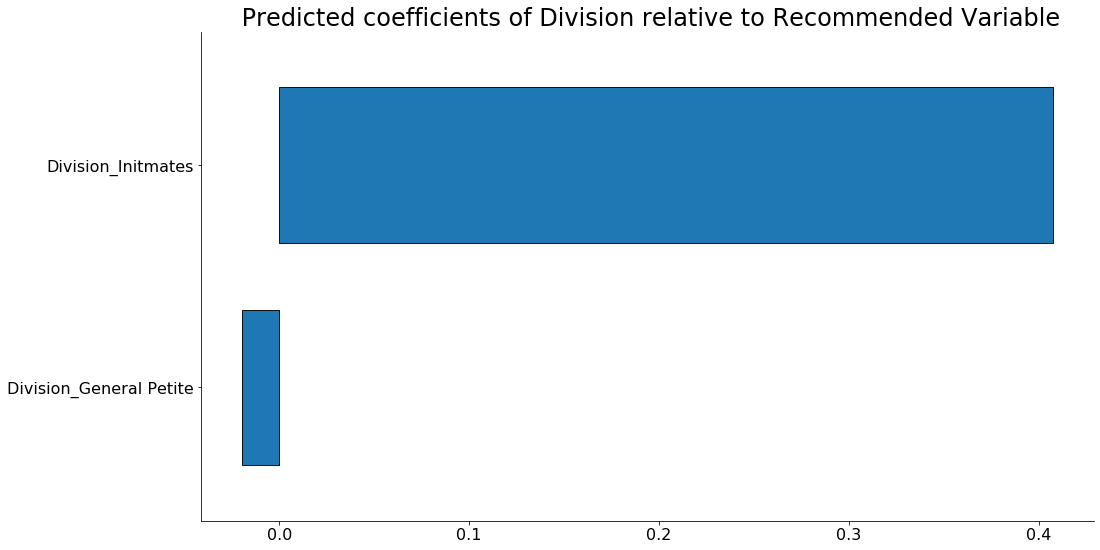

In [1266]:
fig,ax=plt.subplots(figsize=(16,9))
Division.plot(kind="barh", edgecolor="black", width=0.7,linewidth=0.9, alpha=1, ax=ax, fontsize=16)
ax.set_title(" Predicted coefficients of Division relative to Recommended Variable", fontsize=24)
sns.despine()
plt.show

In [1267]:
Department_classification=[]
for k in x_train_tf.columns:
    if "Department"in k.split('_'):
        Department_classification.append(k)
print(Department_classification)
Department=final_model_table.loc[Department_classification].sort_values()
Department

['Department_Dresses', 'Department_Intimate', 'Department_Jackets', 'Department_Tops', 'Department_Trend']


Department_Intimate   -0.735666
Department_Jackets    -0.469662
Department_Tops       -0.364695
Department_Dresses    -0.145089
Department_Trend       0.077180
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

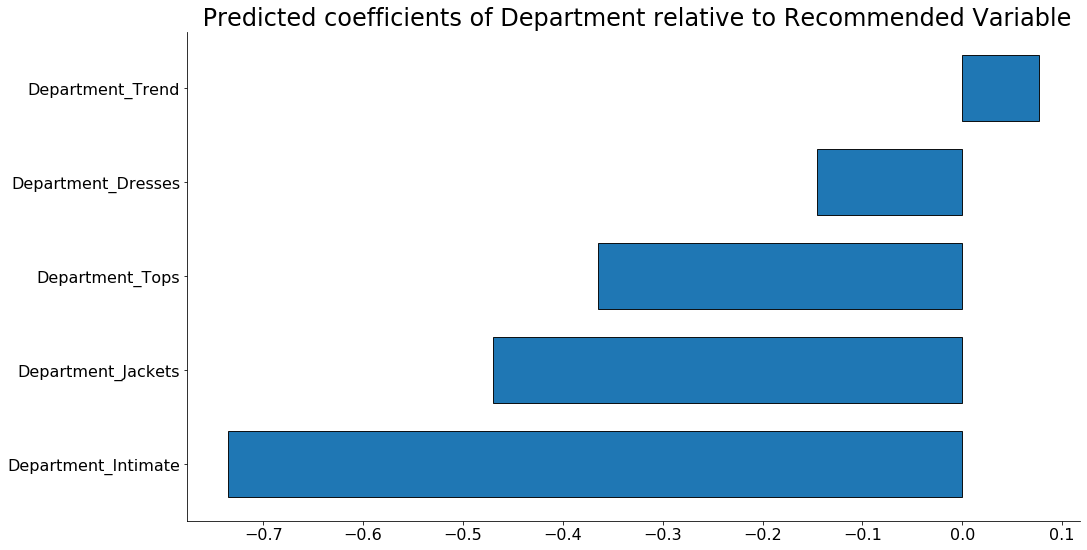

In [1268]:
fig,ax=plt.subplots(figsize=(16,9))
Department.plot(kind="barh", edgecolor="black", width=0.7,linewidth=0.9, alpha=1, ax=ax, fontsize=16)
ax.set_title(" Predicted coefficients of Department relative to Recommended Variable", fontsize=24)
sns.despine()
plt.show

# Final 

In [1269]:
y_predict= final_gridcv.predict(x_test_tf)
submit= pd.DataFrame(np.c_[test['ID'].values,y_predict],columns=['ID','Recommended'])
submit.head(20)
### np.c using between arrays

,ID,Recommended
0,10,0
1,11,1
2,13,1
3,19,1
4,24,1
5,26,0
6,28,1
7,30,1
8,40,1
9,41,1


In [1270]:
print(submit.isna().sum())
print(submit['Recommended'].value_counts())

ID             0
Recommended    0
dtype: int64
1    5187
0    1616
Name: Recommended, dtype: int64


In [1271]:
submit.to_csv("Group102_Test_Results33.csv",index=False)